In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [3]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.7/109.7 kB 607.1 kB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 3.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.0/274.0 kB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.6 MB/s eta 0:00:0000:0100:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 913.9 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import os
from dotenv import load_dotenv

In [8]:
load_dotenv()
DATABASE_URL = os.getenv("DATABASE_URL")
engine = create_engine(DATABASE_URL)

In [10]:
df_aqi = pd.read_sql("SELECT * FROM air_quality", engine)

In [11]:
df_aqi.head()

,id,city,station,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,last_update,created_at
0,1222,Delhi,"Dwarka-Sector 8, Delhi - DPCC",OZONE,12.0,41.0,24.0,2025-11-09 14:00:00,2025-09-11 09:49:41.312872
1,1223,Delhi,"IGI Airport (T3), Delhi - IMD",PM2.5,18.0,67.0,39.0,2025-11-09 14:00:00,2025-09-11 09:49:41.312872
2,1224,Delhi,"ITO, Delhi - CPCB",PM10,26.0,52.0,37.0,2025-11-09 14:00:00,2025-09-11 09:49:41.312872
3,1225,Delhi,"ITO, Delhi - CPCB",NO2,74.0,88.0,82.0,2025-11-09 14:00:00,2025-09-11 09:49:41.312872
4,1226,Delhi,"ITO, Delhi - CPCB",OZONE,8.0,18.0,9.0,2025-11-09 14:00:00,2025-09-11 09:49:41.312872


In [13]:
df_weather = pd.read_sql("SELECT * FROM weather", engine)

In [14]:
df_weather.head()

,id,city,temperature,humidity,pressure,description,timestamp
0,1,Pune,21.4,88.0,29.81,Partly Cloudy,2025-09-06 15:19:17.816856
1,2,Pune,24.5,78.0,1007.00,Patchy rain possible,2025-09-06 14:00:00.000000
2,3,Pune,24.4,77.0,1007.00,Patchy rain possible,2025-09-06 15:00:00.000000
3,4,Pune,23.7,79.0,1007.00,Partly cloudy,2025-09-06 16:00:00.000000
4,5,Pune,22.6,82.0,1008.00,Partly cloudy,2025-09-06 17:00:00.000000


In [16]:
df_aqi.shape

(2030, 9)

In [17]:
df_weather.shape

(678, 7)

In [19]:
df_aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             2030 non-null   int64         
 1   city           2030 non-null   object        
 2   station        2030 non-null   object        
 3   pollutant_id   2030 non-null   object        
 4   pollutant_min  1852 non-null   float64       
 5   pollutant_max  1852 non-null   float64       
 6   pollutant_avg  1852 non-null   float64       
 7   last_update    2030 non-null   datetime64[ns]
 8   created_at     2030 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 142.9+ KB


In [20]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           678 non-null    int64         
 1   city         678 non-null    object        
 2   temperature  678 non-null    float64       
 3   humidity     678 non-null    float64       
 4   pressure     678 non-null    float64       
 5   description  678 non-null    object        
 6   timestamp    678 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 37.2+ KB


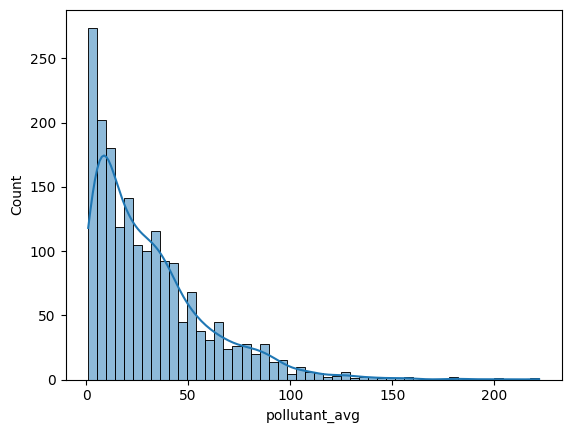

In [21]:
sns.histplot(df_aqi["pollutant_avg"], bins=50, kde=True)
plt.show()


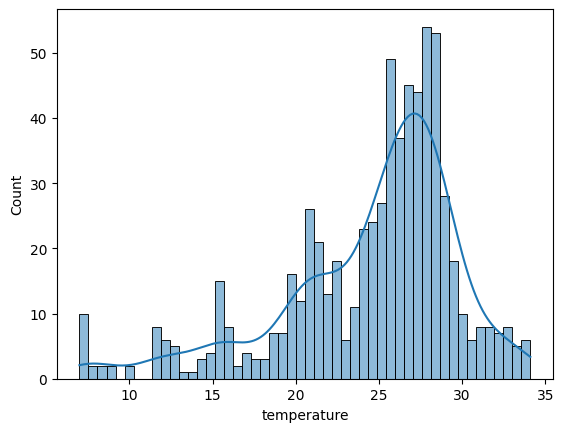

In [22]:
sns.histplot(df_weather["temperature"], bins=50, kde=True)
plt.show()

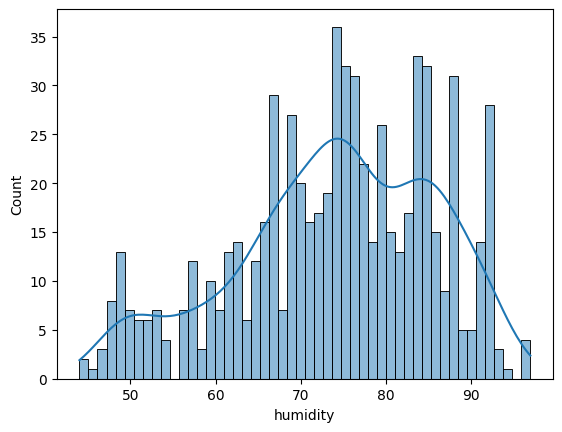

In [23]:
sns.histplot(df_weather["humidity"], bins=50, kde=True)
plt.show()

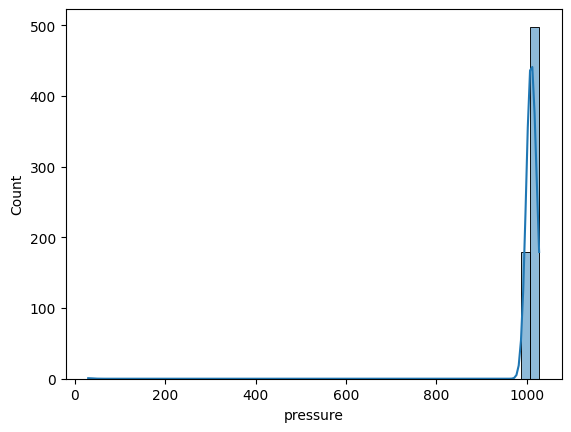

In [24]:
sns.histplot(df_weather["pressure"], bins=50, kde=True)
plt.show()

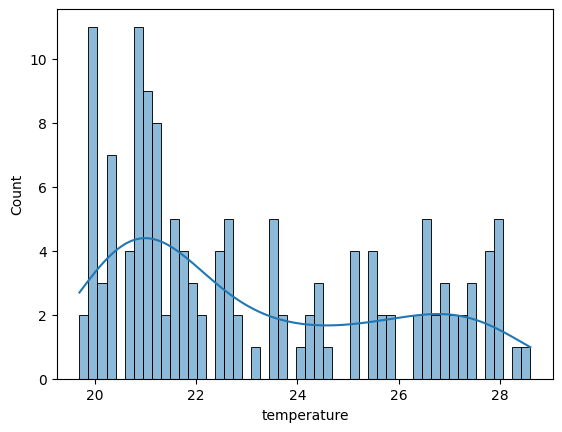

In [30]:
sns.histplot(data=df_weather[df_weather["city"] == "Pune"], x="temperature", bins=50, kde=True)
plt.show()

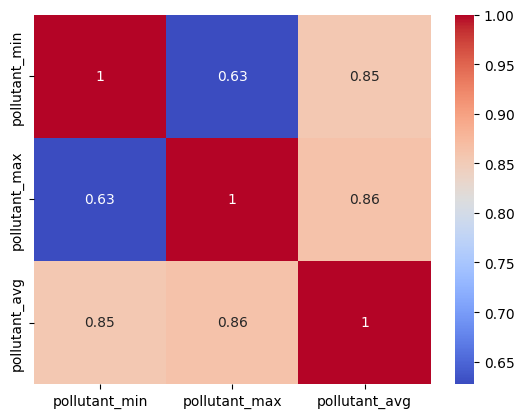

In [34]:
numerical_df = df_aqi[['pollutant_min', 'pollutant_max', 'pollutant_avg']]

sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")
plt.show()

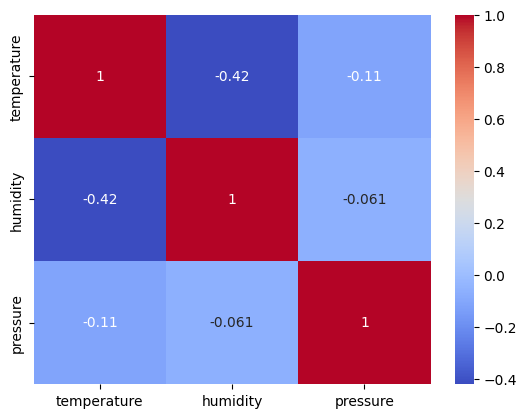

In [35]:
numerical_df2 = df_weather[['temperature', 'humidity', 'pressure']]

sns.heatmap(numerical_df2.corr(), annot=True, cmap="coolwarm")
plt.show()